# Linear Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Model Diagnostics
8. Predictions and Evaluations

Author: Thilagavathy R Vasantharaja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets

In [2]:
data_ = datasets.load_boston()
data_

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston = pd.DataFrame(data_['data'], columns = data_.feature_names)
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [4]:
target = pd.DataFrame(data_['target'], columns = ["Target"])
target.head(2)

,Target
0,24.0
1,21.6


In [5]:
boston.shape

(506, 13)

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


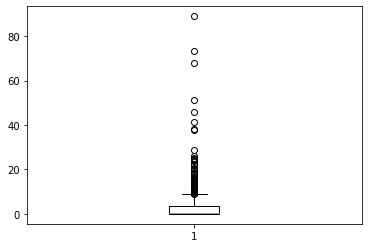

In [8]:
plt.boxplot(boston['CRIM'])
plt.show()

In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

[34.41 34.77 37.97 31.99 34.37 36.98 34.02]
34.41


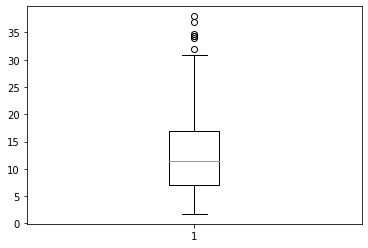

In [10]:

outliers = plt.boxplot(boston["LSTAT"])['fliers'][0].get_data()[1]
print(outliers)
print(outliers[0])


In [11]:
# removing an outliner. Need to make a function to first identify them.

def find_outliner(ds, col) : 
    quart1 = ds[col].quantile(0.25)
    quart3 = ds[col].quantile(0.75)
    IQR = quart3 - quart1
    low_val = quart1 - 1.5 * IQR
    high_val = quart3 + 1.5 * IQR
    ds = ds.loc[(ds[col] < low_val) | (ds[col] > high_val)]
    return ds

outliers = find_outliner(boston, "LSTAT")

print(outliers.shape)
outliers

(7, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02


In [12]:
# remove outliers

def remove_outliers(ds, col) : 
    quart1 = ds[col].quantile(0.25)
    quart3 = ds[col].quantile(0.75)
    IQR = quart3 - quart1
    low_val = quart1 - 1.5 * IQR
    high_val = quart3 + 1.5 * IQR
    
    df_out = ds.loc[(ds[col] > low_val) & (ds[col] < high_val)]
    return df_out

data = remove_outliers(boston, "LSTAT")
data.shape

(499, 13)

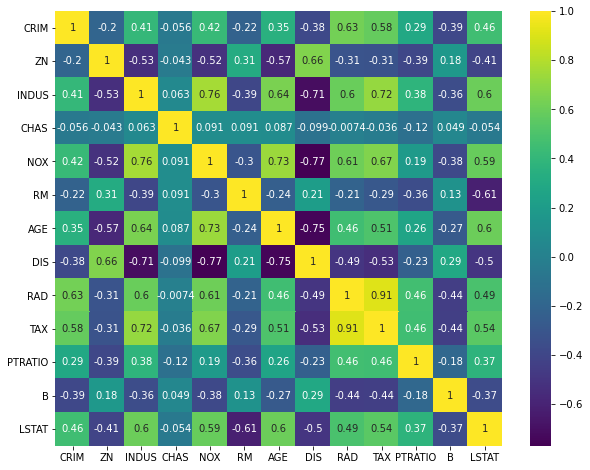

In [32]:
fig = plt.figure(figsize = (10, 8))
sns.heatmap(boston.corr(), annot = True, cmap = "viridis")

# Data preprocessing

In [13]:
X = boston[:]  # boston.copy()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y = target[ : ]

In [15]:
from sklearn.model_selection import train_test_split

# from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


#from sklearn import linear_model
#model = linear_model.

lm.fit(X_train, y_train)

predictions = lm.predict(X_test)


In [24]:
lm.intercept_

array([37.1006295])

In [25]:
lm.rank_

13

In [ ]:
lm.score  # r2_score

In [ ]:
# regularization :  type and type 2 errros, elastic, lasso, ridge

Text(0, 0.5, 'Predicted Y')

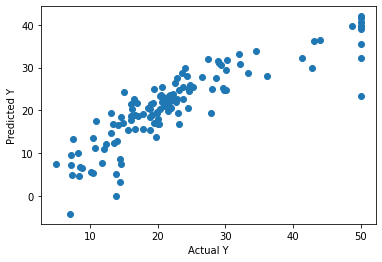

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

Text(0.5, 0, 'Errors')

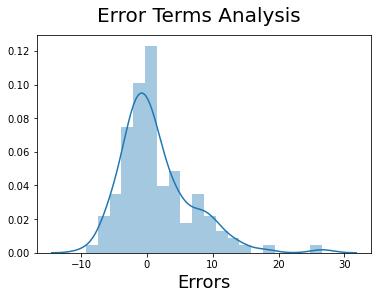

In [18]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - predictions), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [29]:
from sklearn import metrics

In [20]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(y_test, predictions))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(y_test, predictions))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print("metrics.r2_score : ", metrics.r2_score(y_test, predictions))  # model.score(xtest, ytest)


metrics.mean_absolute_error :  3.9134083616590485
metrics.mean_squared_error :  31.337961700221125
np.sqrt(metrics.mean_squared_error :  5.598031948838907
metrics.r2_score :  0.7394423961618936


In [21]:
import statsmodels.formula.api as smf
est = smf.ols("target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        12:07:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# import all libraries and dependencies for machine learning
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

## Approach 2 : RFE and eleminating by using p-value and VIF

In [23]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CRIM', True, 1),
 ('ZN', True, 1),
 ('INDUS', True, 1),
 ('CHAS', True, 1),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', True, 1),
 ('DIS', True, 1),
 ('RAD', True, 1),
 ('TAX', True, 1),
 ('PTRATIO', True, 1),
 ('B', True, 1),
 ('LSTAT', True, 1)]

In [42]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [43]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [44]:
random.seed(0)

# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     78.13
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           6.97e-97
Time:                        02:06:28   Log-Likelihood:                -1097.1
No. Observations:                 379   AIC:                             2222.
Df Residuals:                     365   BIC:                             2277.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1006      5.644      6.573      0.0

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,PTRATIO,89.22
5,RM,80.35
4,NOX,74.44
9,TAX,54.98
11,B,22.34
6,AGE,21.42
7,DIS,15.01
8,RAD,14.44
2,INDUS,14.20
12,LSTAT,11.77


In [48]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['AGE'], 1)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     84.86
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           7.53e-98
Time:                        02:08:37   Log-Likelihood:                -1097.2
No. Observations:                 379   AIC:                             2220.
Df Residuals:                     366   BIC:                             2271.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2107      5.607      6.636      0.0

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,PTRATIO,89.04
5,RM,77.84
4,NOX,68.50
8,TAX,54.95
10,B,22.26
7,RAD,14.36
2,INDUS,14.18
6,DIS,13.26
11,LSTAT,10.42
0,CRIM,2.93


In [51]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('INDUS', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     92.75
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           8.58e-99
Time:                        02:10:00   Log-Likelihood:                -1097.3
No. Observations:                 379   AIC:                             2219.
Df Residuals:                     367   BIC:                             2266.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2203      5.601      6.645      0.0

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,PTRATIO,87.92
4,RM,74.85
3,NOX,63.17
7,TAX,43.68
9,B,22.23
6,RAD,13.25
5,DIS,12.27
10,LSTAT,10.23
0,CRIM,2.92
1,ZN,2.76


In [53]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('CRIM', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.76e-99
Time:                        02:10:34   Log-Likelihood:                -1098.8
No. Observations:                 379   AIC:                             2220.
Df Residuals:                     368   BIC:                             2263.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5543      5.535      6.424      0.0

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,PTRATIO,87.48
3,RM,74.84
2,NOX,63.12
6,TAX,43.67
8,B,21.44
4,DIS,12.10
5,RAD,11.53
9,LSTAT,9.94
0,ZN,2.72
1,CHAS,1.14


## Model Prediction and Evaluation

In [59]:
# Predicting the price of training set.
# X_test = X_test.drop(['AGE', "CRIM", 'INDUS'], axis = 1)

X_train = X_train_rfe3

model_final = LinearRegression()

model_final.fit(X_train, y_train)

prediction = model_final.predict(X_test)

In [60]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(y_test, predictions))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(y_test, predictions))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("metrics.r2_score : ", metrics.r2_score(y_test, predictions))

metrics.mean_absolute_error :  3.9134083616590485
metrics.mean_squared_error :  31.337961700221125
np.sqrt(metrics.mean_squared_error :  5.598031948838907
metrics.r2_score :  0.7394423961618936


In [61]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
mean_absolute_percentage_error(y_test, prediction)

20.906386698857464

Text(0, 0.5, 'Predicted value')

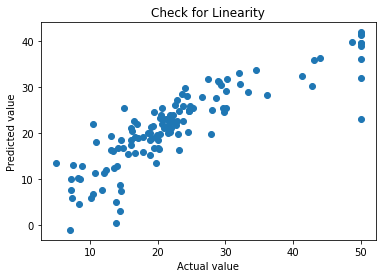

In [66]:
# Check for Linearity
plt.scatter(y_test, prediction)

plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

Text(0.5, 0, 'Errors')

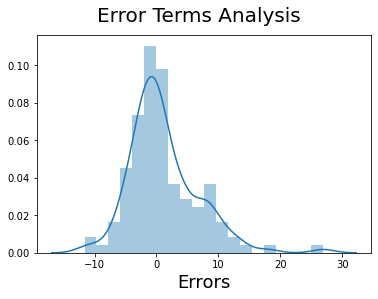

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)